In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn import model_selection
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import plotly.graph_objs as go
import plotly.offline as py

In [2]:
df = pd.read_csv('stemming.csv', sep=',')
#print (df)
print(df.columns)

Index(['Unnamed: 0', 'waktu', 'user', 'text', 'STOP_REMOVAL', 'STEMMING',
       'label'],
      dtype='object')


In [3]:
#Polaritas Label
def convert(polarity):
    if polarity == 'true':
        return 1
    else:
        return 0

df['Polarity'] = df['label'].apply(convert)

In [4]:
df.head(5)

Unnamed: 0                      waktu        user  \
0           0  2021-11-25 10:22:37+00:00   triherlan   
1           1  2021-11-25 10:22:35+00:00  fahadkanan   
2           2  2021-11-25 10:22:35+00:00   jinkyukkk   
3           3  2021-11-25 10:22:30+00:00  budiatnogr   
4           4  2021-11-25 10:22:29+00:00   beritartm   

                                                text  \
0   judul berita nya mantap tendang anwar abbas u...   
1   ceo formula alberto longgo menampik bhw jakar...   
2         iyahhh 2022 berita datings seokbeen xixixi   
3   terkait isu pemilihan vanue formula akan dite...   
4  infografik bajet2022 dana khas bank negara unt...   

                                        STOP_REMOVAL  \
0   judul berita nya mantap tendang anwar abbas u...   
1   ceo formula alberto longgo menampik bhw jakar...   
2         iyahhh 2022 berita datings seokbeen xixixi   
3   terkait isu pemilihan vanue formula ditentuka...   
4  infografik bajet2022 dana khas bank negara pmk...   

                                            STEMMING  label  Polarity  
0  judul berita nya mantap tendang anwar abbas ulama  false         0  
1  ceo formula alberto longgo tampik bhw jakarta ...   true         1  
2                       2022 berita datings seokbeen  false         0  
3  kait isu pilih vanue formula tentu presiden te...   true         1  
4  infografik bajet2022 dana khas bank negara pmk...   true         1

In [5]:
val=df['Polarity'].value_counts().reset_index()
val.columns=['Polarity','Count']

data=[go.Bar(
  x=val.Polarity,
y=val.Count
)]
layout=go.Layout(
    xaxis=dict(title='Polarity'),
    yaxis=dict(title='Count'))
fig=go.Figure(data=data,layout=layout)
py.iplot(fig)

In [6]:
X = df['STEMMING']
y = df['Polarity']

In [7]:
#Splitting Data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [8]:
#Count Vectorizer
#Kata-kata ini kemudian perlu dienkode sebagai bilangan bulat, atau nilai floating-point, untuk digunakan sebagai masukan dalam algoritme pembelajaran mesin. Proses ini disebut ekstraksi fitur (atau vektorisasi)

vectorization = CountVectorizer()
Xv_train = vectorization.fit_transform(X_train)
Xv_test = vectorization.transform(X_test)

In [9]:
Xv_train.shape

(375, 1419)

In [10]:
Xv_test.shape

(126, 1419)

In [11]:
#Classifier
mnb = MultinomialNB()
mnb.fit(Xv_train, y_train)

MultinomialNB()

In [12]:
preds = mnb.predict(Xv_test)

In [13]:
mnb.score(Xv_test, y_test)

0.8412698412698413

In [14]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.81      0.70      0.75        43
           1       0.85      0.92      0.88        83

    accuracy                           0.84       126
   macro avg       0.83      0.81      0.82       126
weighted avg       0.84      0.84      0.84       126



In [15]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    preds = mnb.predict(new_xv_test)
    return preds

In [17]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, preds)))

Model accuracy score: 0.8413


In [18]:
y_pred_train = mnb.predict(Xv_train)

y_pred_train

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,

In [19]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9387


In [20]:
#Overfitting dan underfitting
print('Training set accuracy score: {:.4f}'.format(mnb.score(Xv_train, y_train)))

print('Test set accuracy score: {:.4f}'.format(mnb.score(Xv_test, y_test)))

Training set accuracy score: 0.9387
Test set accuracy score: 0.8413


In [21]:
y_test.value_counts()

1    83
0    43
Name: Polarity, dtype: int64

In [2]:
null_accuracy = (83/(83+43))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.6587


In [23]:
from io import StringIO
classification = classification_report(y_test, preds)
s = StringIO(classification)
with open ('classificationmnb.csv','w') as f:
    for line in s:
        f.write(line)

In [24]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, preds)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[30 13]
 [ 7 76]]

True Positives(TP) =  30

True Negatives(TN) =  76

False Positives(FP) =  13

False Negatives(FN) =  7


<AxesSubplot:>

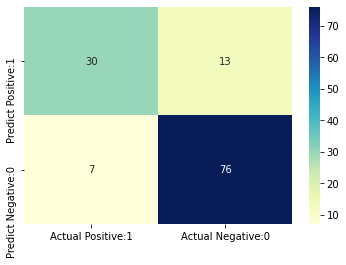

In [25]:
import seaborn as sns
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [26]:
import pickle

with open('multinomial_naivebayes', 'wb') as a:
    pickle.dump(mnb,a)

In [27]:
with open('vectorize', 'wb') as a:
    pickle.dump(vectorization,a)